In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trip = pd.read_csv('data/trip.csv')
weather = pd.read_csv('data/weather.csv')

In [3]:
sample = trip.sample(50000)

In [4]:
# Mover hora a su propia columna
sample['start_time'] = sample.loc[:,'start_date'].map(lambda s: s.split(' ')[1])
sample['hours_from_midnight'] = sample['start_time'].map(lambda s: float(s.split(':')[0]) + float(s.split(':')[1])/60)
sample.loc[:,'start_date'] = sample.loc[:,'start_date'].map(lambda s: s.split(' ')[0])
sample.loc[:,['start_date','start_time','hours_from_midnight']].head()

,start_date,start_time,hours_from_midnight
135132,2/17/2014,13:36,13.600000
445787,4/27/2015,18:19,18.316667
543783,1/19/2015,9:17,9.283333
366366,7/15/2015,8:45,8.750000
293255,3/28/2014,8:32,8.533333


In [6]:
sample['weekday'] = pd.to_datetime(sample['start_date']).dt.weekday

In [7]:
curated_weather = weather[weather.zip_code == 94107]
del curated_weather['zip_code']
curated_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0


In [9]:
comb = sample.merge(curated_weather, how='outer', left_on='start_date', right_on='date')
comb.columns

Index([u'id', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'bike_id', u'subscription_type', u'zip_code',
       u'start_time', u'hours_from_midnight', u'weekday', u'date',
       u'max_temperature_f', u'mean_temperature_f', u'min_temperature_f',
       u'max_dew_point_f', u'mean_dew_point_f', u'min_dew_point_f',
       u'max_humidity', u'mean_humidity', u'min_humidity',
       u'max_sea_level_pressure_inches', u'mean_sea_level_pressure_inches',
       u'min_sea_level_pressure_inches', u'max_visibility_miles',
       u'mean_visibility_miles', u'min_visibility_miles',
       u'max_wind_Speed_mph', u'mean_wind_speed_mph', u'max_gust_speed_mph',
       u'precipitation_inches', u'cloud_cover', u'events',
       u'wind_dir_degrees'],
      dtype='object')

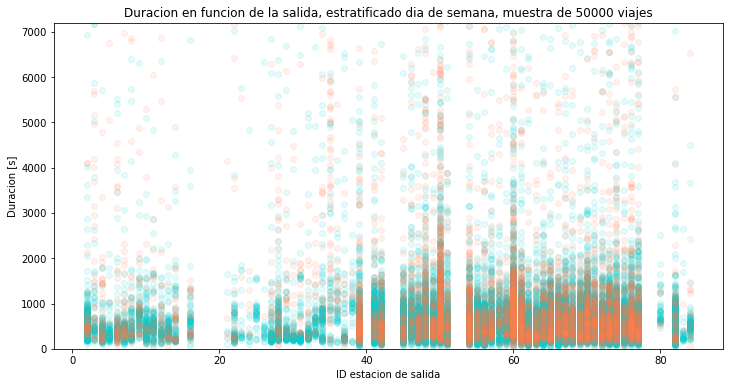

In [30]:
plt.figure(figsize=(12,6))
plt.ylim(0,7200)
plt.scatter(x=sample.loc[sample['weekday'] < 5, 'start_station_id'], 
            y=sample.loc[sample['weekday'] < 5, 'duration'],\
            c='darkturquoise', alpha=0.1)
plt.scatter(x=sample.loc[sample['weekday'] >= 5, 'start_station_id'], 
            y=sample.loc[sample['weekday'] >= 5, 'duration'],\
            c='coral', alpha=0.1)
plt.title("Duracion en funcion de la salida, estratificado dia de semana, muestra de 50000 viajes")
plt.xlabel("ID estacion de salida")
plt.ylabel("Duracion [s]")

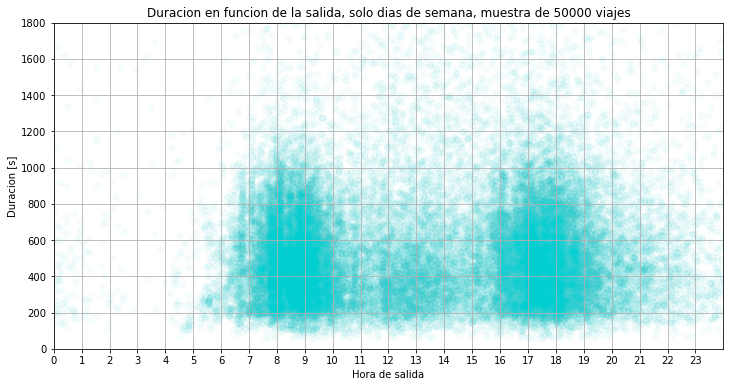

In [46]:
plt.figure(figsize=(12,6))
plt.xlim(0,24)
plt.ylim(0,1800)
plt.xticks(range(0,24))
plt.grid()
plt.scatter(x=sample.loc[sample['weekday'] < 5, 'hours_from_midnight'], 
            y=sample.loc[sample['weekday'] < 5, 'duration'],\
            c='darkturquoise', alpha=0.03)
\plt.title("Duracion en funcion de la salida, solo dias de semana, muestra de 50000 viajes")
plt.xlabel("Hora de salida")
plt.ylabel("Duracion [s]")

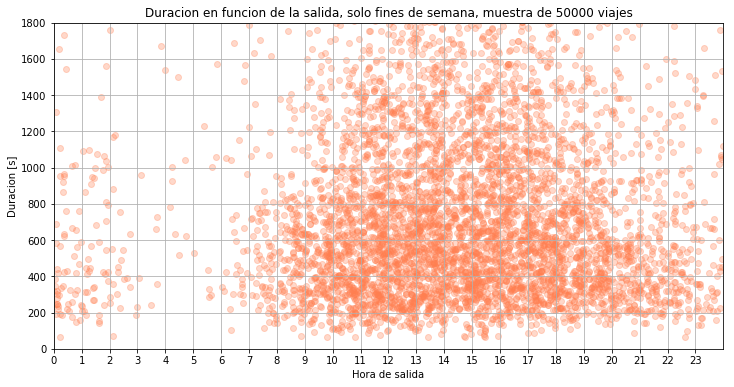

In [48]:
plt.figure(figsize=(12,6))
plt.xlim(0,24)
plt.ylim(0,1800)
plt.xticks(range(0,24))
plt.grid()
plt.scatter(x=sample.loc[sample['weekday'] >= 5, 'hours_from_midnight'], 
            y=sample.loc[sample['weekday'] >= 5, 'duration'],\
            c='coral', alpha=0.3)
plt.title("Duracion en funcion de la salida, solo fines de semana, muestra de 50000 viajes")
plt.xlabel("Hora de salida")
plt.ylabel("Duracion [s]")

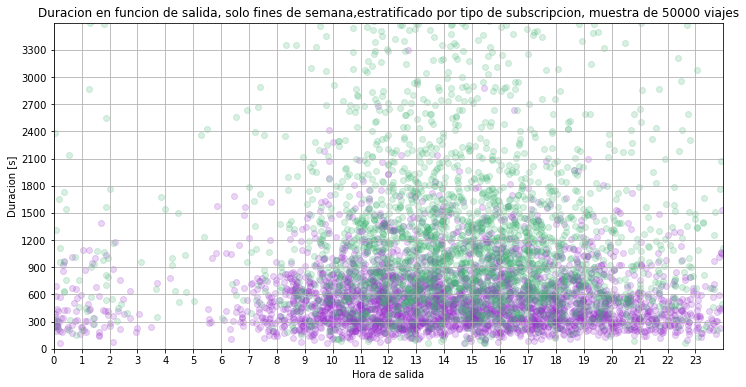

In [64]:
plt.figure(figsize=(12,6))
plt.xlim(0,24)
plt.ylim(0,3600)
plt.xticks(range(0,24))
plt.yticks(range(0,3600,300))
plt.grid()
plt.scatter(x=sample.loc[(sample.weekday >= 5) & (sample.subscription_type == "Subscriber"), 'hours_from_midnight'], 
            y=sample.loc[(sample.weekday >= 5) & (sample.subscription_type == "Subscriber"), 'duration'],\
            c='darkorchid', alpha=0.2)
plt.scatter(x=sample.loc[(sample.weekday >= 5) & (sample.subscription_type == "Customer"), 'hours_from_midnight'], 
            y=sample.loc[(sample.weekday >= 5) & (sample.subscription_type == "Customer"), 'duration'],\
            c='mediumseagreen', alpha=0.2)
plt.title("Duracion en funcion de salida, solo fines de semana,\
estratificado por tipo de subscripcion, muestra de 50000 viajes")
plt.xlabel("Hora de salida")
plt.ylabel("Duracion [s]")

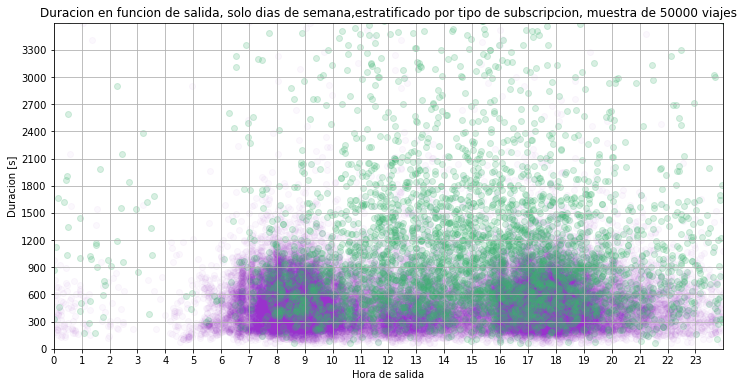

In [68]:
plt.figure(figsize=(12,6))
plt.xlim(0,24)
plt.ylim(0,3600)
plt.xticks(range(0,24))
plt.yticks(range(0,3600,300))
plt.grid()
plt.scatter(x=sample.loc[(sample.weekday < 5) & (sample.subscription_type == "Subscriber"), 'hours_from_midnight'], 
            y=sample.loc[(sample.weekday < 5) & (sample.subscription_type == "Subscriber"), 'duration'],\
            c='darkorchid', alpha=0.03)
plt.scatter(x=sample.loc[(sample.weekday < 5) & (sample.subscription_type == "Customer"), 'hours_from_midnight'], 
            y=sample.loc[(sample.weekday < 5) & (sample.subscription_type == "Customer"), 'duration'],\
            c='mediumseagreen', alpha=0.2)
plt.title("Duracion en funcion de salida, solo dias de semana,\
estratificado por tipo de subscripcion, muestra de 50000 viajes")
plt.xlabel("Hora de salida")
plt.ylabel("Duracion [s]")